# **İlgili Kütüphanelerin ve Araçların Eklenmesi**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist # Dataset hazır olarak Keras'ta bulunmaktadır.
from tensorflow.keras.utils import to_categorical

Yapılacak ilk işlem veri setinin yüklenmesi olacaktır. Veri seti incelendiği zaman kendisi 60.000 eğitim 10.000 test verisine sahip şekilde bölünmüştür. İçerisinde bulunan veriler ise 28x28 boyutundadır.

### **Piksel Değerlerinin Normalleştirilmesi**

Görüntü verilerimizi için pixel değerleri 0-255 aralığındadır. Ancak sinir ağları küçük ağırlık değerleri kullanarak girdileri işler ve büyük tamsayı değerlerine sahip girdiler öğrenme sürecini bozabilir veya yavaşlatabilir. Bu nedenle, her piksel değeri 0 ile 1 arasında bir değere sahip olacak şekilde piksel değerlerini normalleştirmek daha optimal sonucu sunmaktadır.

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data(); # Dataset yüklemesi yapılır.

x_train = x_train.astype('float32') / 255.0 # Normalleştirme
x_test = x_test.astype('float32') / 255.0 # Normalleştirme

print('Train Seti (Veri Sayısı, Yükseklik, Genişlik) => ',x_train.shape) 
print('Test Verileri (Veri Sayısı, Yükseklik, Genişlik) => ',x_test.shape)

Train Seti (Veri Sayısı, Yükseklik, Genişlik) =>  (60000, 28, 28)
Test Verileri (Veri Sayısı, Yükseklik, Genişlik) =>  (10000, 28, 28)


### **Veriyi İşleme**

Normalde verisetinin kendi özelliği olan 28x28 görüntü pixel sayısını 28x28x1 olarak yeniden düzenliyoruz. Bu gereklidir çünkü görüntülerimiz renkli olsaydı 28x28x3 şeklinde olması gerekiyordu (RGB = Kırmızı Yeşil Mavi). Ancak görüntülerimiz gri tonlamalı olduğundan, sonına bir boyut eklememiz gerekmektedir. Bu sonuç doğrultusunda 28x28x1 olarak dizayn edilmiştir. 

In [ ]:
input_shape = (x_train.shape[1:] + (1,)) # x_train.shape[1:] = (28, 28) => + (1,) => (28, 28, 1)    
num_classes = len(np.unique(y_train)) # 10 adet sınıfımız mevcuttur.

10 adet sınıfımız mevcuttur. np.unique(y_train) metodu ile eşsiz olan sınıflar belirlenir ve bunlar da aşağıdakilerdir;

0-) T-shirt/top 

1-) Trouser 

2-) Pullover 

3-) Dress 

4-) Coat 

5-) Sandal 

6-) Shirt 

7-) Sneaker 

8-) Bag 

9-) Ankle boot

### **Veri Dizilerinin Eşitlenmesi**

Farklı katagorileri temsil eden tamsayılara sahip bir sınıf vektörünün ikili sınıf matrisine dönüştürülmesi ve eşit sütunlara sahip olması amacıyla ***to_categorical*** kullanılmaktadır. 

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## **Model Oluşturmak**

İlk olarak bir girdi alan ve bu girdi sonucu çıktı üreten bir 28x28x1 girdi katmanı oluşturulur.

1.Conv Katmanı => Oluşturulmuş girdi katmanından gelen çıktıyı alıp filtreleyen bir Conv2D katmanı oluşturulur. Bu katmanın girdisi input katmanının çıktısıdır. 28x28x1 gelen veri 26x26x32 olarak çıkar. Yükseklik ve genişliğin düşmesinin sebebi ise **padding** işleminin uygulanmasıdır. Derinliğin ise 32 olarak çıkmasının sebebebi 32 filtrenin uygulanmasıdır. Her bir uygulanan filtre beraberinde bir tensör (vektör/matris genellemesi) üretecektir. Bu durumda 32 tane uygulanan filtre sonucu 32 adet üretilen tensör, 3.eksen boyunca yerleşerek 26x26x32'lik bir çıktı oluşturmaktadır.

2.Conv Katmanı => Aynı çalışma mantığı ile tekrar filtrelenen katman 64 derinliğe sahip olur. Padding işleminden geçen 26x26 lık veri 24x24'lük veri haline gelmektedir.

3.MaxPooling2D => 2x2 büyüklüğünde bir filtre oluşturulur. Bu alan içerisindeki en büyük değer alınarak sinir ağının doğru karar vermesi için yeterli bilgiyi içeren ve boyut olarak küçülen bir çıktıya sahip olur.

4.Dropout Katmanı => Bırakma, eğitim aşamasının her güncellemesinde gizli birimlerin giden kenarlarını rastgele olarak 0'a ayarlayarak çalışır böylece modelin fazla takılmasını önler.
Bırakma, belirli bir nöron için çıktıyı rasgele 0'a ayarlayarak bir modelin genellenmesine yardımcı olabilir. Çıktıyı 0'a ayarlarken, maliyet işlevi, geri yayılma işlemi sırasında ağırlıkların güncellenme şeklini değiştirerek komşu nöronlara karşı daha duyarlı hale gelir.

5.Flatten Katmanı => Çok boyutlu bir matris verisini sinir ağına sokamayız. Bu nedenle tek boyutlu olacak şekilde Düzleştirme(Flattening) işlemi yapılır.

6.Dense Katmanı => Bu “fully connected layer” olarak da biliniyor. Yani bu katmanın bütün girişleri ve bütün çıkışları birbirine bağlı ve her birinin ayrı bir weighti var.

7.Son Dense Katmanı => 10 tane çıkışı olan fully connected katman eklemesi. Aktivasyon fonksiyonu olarak Softmax seçilmiştir. Sigmoid fonksiyonu gibi ikiden fazla sınıflandırmanın yapılacağı durumlarda kullanılmaktadır. Derin öğrenme modellerinin çıkış katmanında tercih edilmektedir. Girdinin belirli bir sınıfa ait olma olasılığını 0-1 aralığında değerler üreterek belirlenmesini sağlamaktadır.

ReLu hız bakımından avantajlı olacaktır. Genellikle çıkış değil ara katmanlarda kullanılır. Çıkış katmanlarında ise Softmax kullanımı optimal performans için tavsiye edilmektedir.


In [ ]:
inp = Input(shape=input_shape)                                     # Bir girdi alan ve bir çıktısı olan 28x28x1 girdi katmanıdır.
_ = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inp) # Bu katmanın girdisi, inputun çıktısıdır. 28x28x1 dizisi girer ve 26x26x32 dizisi çıkar.(Padding)
_ = MaxPool2D(pool_size=(2, 2))(_)                                 # 2x2 boyutunda filtre ile pooling işlemi.
_ = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(_)   # Önceki katmadandan gelen çıktı, 64 filtre ile uygulanır ve 24x24x64 dizisi çıkar. (26x26 Padding=> 24x24)
_ = MaxPool2D(pool_size=(2, 2))(_)                                 # 2x2 boyutunda filtre ile pooling işlemi.
_ = Dropout(0.25)(_)                                               # Kaybı azaltmak için yardımcı olur. 
_ = Flatten()(_)                                                   # Düzleştirme İşlemimiz.
_ = Dense(units=128, activation='relu')(_)                         # Fully Connected Layer
_ = Dropout(0.2)(_)                                                # Kaybı azaltmak için yardımcı olur. 
_ = Dense(units=num_classes, activation='softmax')(_)              # 10 Çıkışlı Fully Connected Layer.
model = Model(inputs=inp, outputs=_)

## **Modelin Derlenmesi**

Optimizer, öğrenme oranını kontrol eder. Optimizer olarak “adam” kullanıyoruz. Adam genellikle birçok durumda kullanmak için iyi bir optimizasyon algoritmasıdır. Adam algoritması, eğitim boyunca öğrenme oranını ayarlar. Faydaları aşağıdaki gibidir;

-Uygulaması kolay.

-Hesaplamalı olarak verimli.

-Küçük bellek gereksinimleri.

-Degradelerin değişmezden çapraza yeniden ölçeklenmesi.

-Veri ve/veya parametreler açısından büyük olan problemler için çok uygundur.

-Durağan olmayan amaçlar için uygundur.

-Çok gürültülü/veya seyrek eğimli problemler için uygundur.

-Hiper-parametrelerin sezgisel yorumu vardır ve genellikle çok az ayarlama gerektirir.

Loss, Kayıp fonksiyonu, tahmin edilen bir değerin gerçek değerinden ne kadar uzak olduğunu ölçer. Bu derlenme aşaması için categorical_crossentropy kullanılmıştır.

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy']
              )

## **Modelin Eğitilmesi**

Modeli eğitme aşamasında, eğitim görüntülerini ve eğitim katmanlarını fit metoduna sokuyoruz. Epoch sayısını ise 12 olarak belirliyoruz ki model 12 iterasyon eğitilsin.

Batch_Size değişkenini 128 olarak atanması ve eğitim sırasında modelin 128'er örnek ile çalışması. İlk 128 veri bittikten sonra diğer 128 veriye geçer. 1-128, 129-256....

Validation_Split değişkeni 0.3 olarak ayarlanmıştır yani burada modelimiz 60.000 verinin 42.000 verisi ile modelimizi eğitecektir. Kalan 18.000 veri ile test edecektir ve hatalarını düzeltecektir.

In [ ]:
Fit_Model = model.fit(np.expand_dims(x_train, -1), y_train, batch_size=128, epochs=12, validation_split=0.3)

Epoch 1/12
329/329 [==============================] - 110s 333ms/step - loss: 0.4900 - accuracy: 0.8256 - val_loss: 0.3439 - val_accuracy: 0.8739
Epoch 2/12
329/329 [==============================] - 108s 329ms/step - loss: 0.3095 - accuracy: 0.8880 - val_loss: 0.2693 - val_accuracy: 0.9031
Epoch 3/12
329/329 [==============================] - 109s 333ms/step - loss: 0.2559 - accuracy: 0.9070 - val_loss: 0.2442 - val_accuracy: 0.9087
Epoch 4/12
329/329 [==============================] - 109s 332ms/step - loss: 0.2249 - accuracy: 0.9162 - val_loss: 0.2318 - val_accuracy: 0.9169
Epoch 5/12
329/329 [==============================] - 109s 333ms/step - loss: 0.1939 - accuracy: 0.9275 - val_loss: 0.2182 - val_accuracy: 0.9232
Epoch 6/12
329/329 [==============================] - 108s 329ms/step - loss: 0.1703 - accuracy: 0.9359 - val_loss: 0.2209 - val_accuracy: 0.9211
Epoch 7/12
329/329 [==============================] - 109s 331ms/step - loss: 0.1470 - accuracy: 0.9452 - val_loss: 0.2391 -

model.evaluate () – model.compile () adımında belirtilen kayıp ve metrikleri bulur. Hem test verilerini hem de etiketleri girdi olarak alır ve doğruluğun nicel bir ölçüsünü verir. Çapraz doğrulama yapmak ve en iyi modeli elde etmek için parametreleri daha ince ayar yapmak için de kullanılabilir.

In [ ]:
loss, accuracy = model.evaluate(np.expand_dims(x_test, -1), y_test, verbose=0)
print("Modelin Kaybı => ",loss)
print('Modelin Doğruluk Oranı => ',accuracy )

Modelin Kaybı =>  0.307476282119751
Modelin Doğruluk Oranı =>  0.9132999777793884


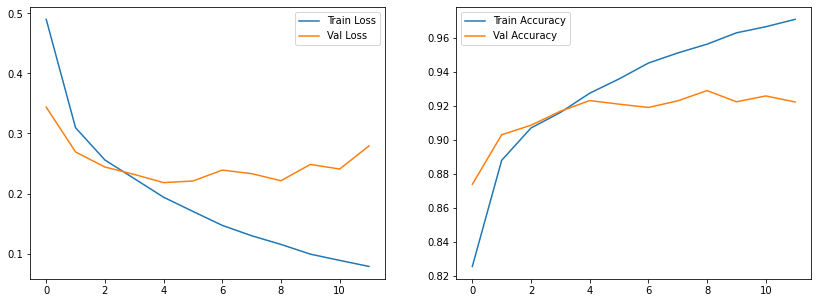

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(Fit_Model.history['loss'], label='Train Loss')
ax1.plot(Fit_Model.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(Fit_Model.history['accuracy'], label='Train Accuracy')
ax2.plot(Fit_Model.history['val_accuracy'], label='Val Accuracy')
ax2.legend()